<a href="https://colab.research.google.com/github/Chercas/ML_2021/blob/main/Simpliest_tf_keras_ML_for_fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [18]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [19]:
model = keras.models.Sequential()

In [20]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=43, validation_data=(X_valid, y_valid))

Epoch 1/43
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4941 - accuracy: 0.8288 - val_loss: 0.4648 - val_accuracy: 0.8416
Epoch 2/43
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4465 - accuracy: 0.8444 - val_loss: 0.4466 - val_accuracy: 0.8410
Epoch 3/43
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4190 - accuracy: 0.8541 - val_loss: 0.3953 - val_accuracy: 0.8634
Epoch 4/43
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3986 - accuracy: 0.8601 - val_loss: 0.3902 - val_accuracy: 0.8648
Epoch 5/43
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3826 - accuracy: 0.8655 - val_loss: 0.3760 - val_accuracy: 0.8732
Epoch 6/43
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3690 - accuracy: 0.8701 - val_loss: 0.3635 - val_accuracy: 0.8744
Epoch 7/43
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3570 - accuracy: 0.8739 - val_loss: 0.3665 - val_accuracy:

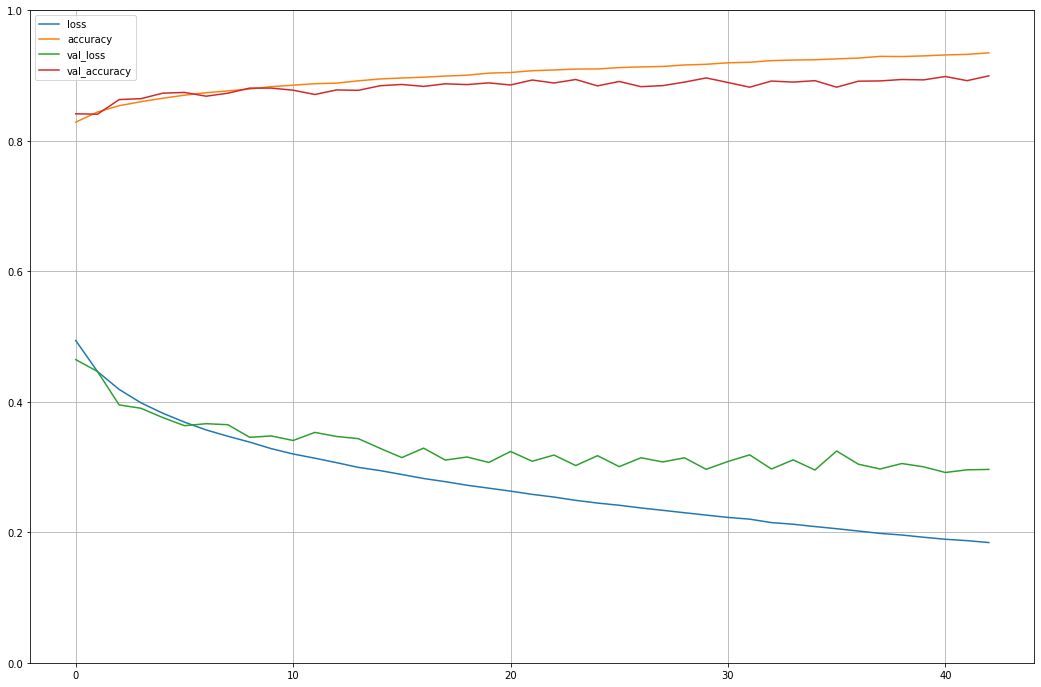

In [25]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(18, 12))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 81.1835 - accuracy: 0.8350


[81.18352508544922, 0.8349999785423279]

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

In [39]:
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [41]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [47]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [48]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)